### Gerekli Kütüphanelerin Import Edilmesi

In [2]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,15)

### Cascade Dosyalarının Belirlenmesi

In [14]:
cascPath = "/Users/amet/Documents/openCV_Workshop/find_face_by_photo/cascades/haarcascade_frontalface_alt2.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

eyePath = "/Users/amet/Documents/openCV_Workshop/find_face_by_photo/cascades/haarcascade_eye.xml"
eyeCascade = cv2.CascadeClassifier(eyePath)

### Dosya Okuması Gerçekleştirmek 

openCV görüntüleri RGB değil, BGR formatında okur

In [15]:
imgFile = cv2.imread('/Users/amet/Documents/openCV_Workshop/find_face_by_photo/gr.jpg')

### Üzerinde oynanmayan dosyayı görüntülemek 

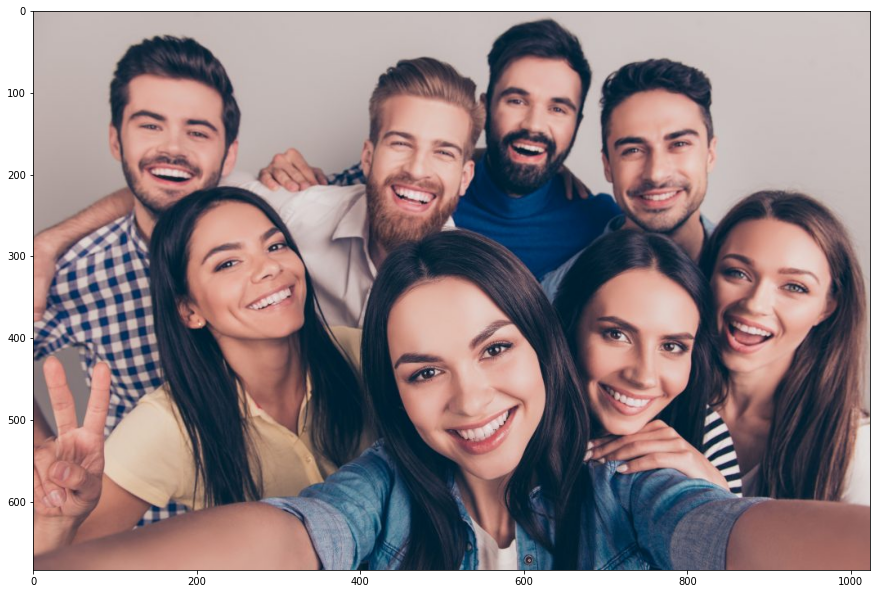

In [16]:
rgbImage = cv2.cvtColor(imgFile, cv2.COLOR_BGR2RGB)


plt.imshow(rgbImage)


#cv2.imshow(imgFile)



### Görüntüyü griye çevirmek

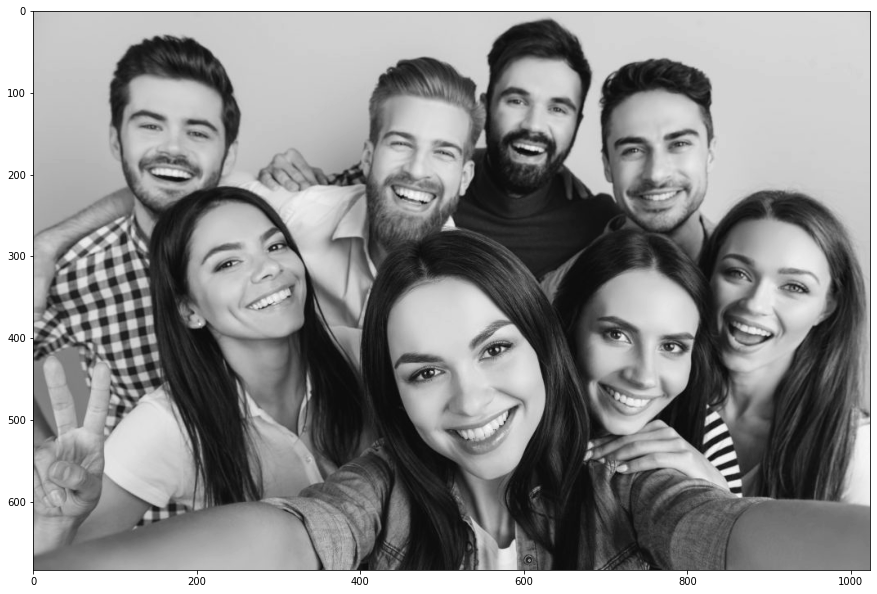

In [17]:
grayImg = cv2.cvtColor(imgFile, cv2.COLOR_BGR2GRAY)

plt.imshow(grayImg, cmap='gray')


### Cascade yardımı ile obje tespiti

In [18]:
faces = faceCascade.detectMultiScale(
        grayImg,
        scaleFactor=1.1,
        minNeighbors=3,
        minSize=(30, 30)
    )

eyes = eyeCascade.detectMultiScale(
        grayImg,
        scaleFactor =1.1,
        minNeighbors = 8,
        minSize = (1,1)
)

### Bulunan objeler Python için ne anlam ifade ediyor?

In [37]:
faces

array([[543,  58, 142, 142],
       [403, 111, 145, 145],
       [685, 107, 155, 155],
       [ 94,  82, 153, 153],
       [659, 332, 179, 179],
       [419, 352, 213, 213],
       [182, 244, 163, 163],
       [808, 259, 178, 178]], dtype=int32)

### Bulunan objelerin görüntü üzerine işlenmesi

In [19]:
for (x, y, w, h) in faces:
        cv2.rectangle(imgFile, (x, y), (x+w, y+h), (0, 255, 0), 3)

for (x, y, w, h) in eyes:
       cv2.rectangle(imgFile, (x, y), (x+w, y+h), (255, 0, 0), 2)


### Caption ayarlama ve Final resmini gösterme

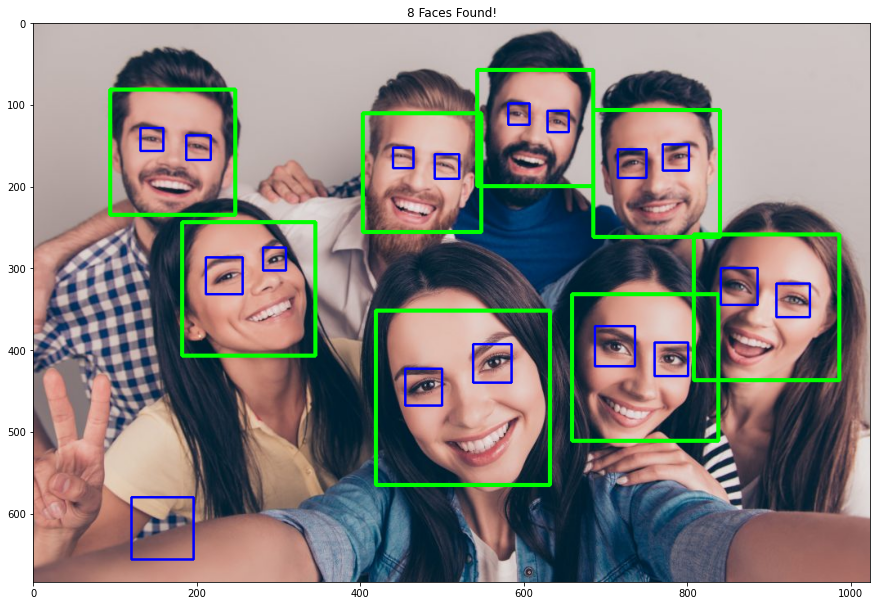

In [21]:
rgbImage = cv2.cvtColor(imgFile, cv2.COLOR_BGR2RGB)

plt.title("{} Faces Found!".format(len(faces)))
plt.imshow(rgbImage)